# Определение возраста покупателей

В эпоху стремительного развития технологий компьютерное зрение становится неотъемлемой частью бизнеса, позволяя автоматизировать процессы и повышать эффективность. В данном проекте мы рассмотрим применение компьютерного зрения в ритейле, а именно в сети супермаркетов "Хлеб-Соль".

Целью проекта является разработка модели, способной по фотографии покупателя определять его приблизительный возраст. Внедрение такой системы в прикассовой зоне позволит сети супермаркетов решать две важные задачи:

1.  **Анализ покупательского поведения и персонализация предложений:** Определение возраста клиентов позволит анализировать их покупательские предпочтения и формировать персонализированные предложения, соответствующие интересам различных возрастных групп. Это, в свою очередь, способствует повышению лояльности клиентов и увеличению продаж.
2.  **Контроль соблюдения законодательства при продаже алкоголя:** Система компьютерного зрения поможет контролировать добросовестность кассиров при продаже алкогольной продукции, исключая возможность продажи несовершеннолетним.

Для достижения поставленной цели необходимо выполнить следующие шаги:

1.  **Исследовательский анализ данных:** Изучить предоставленный набор фотографий, выявить особенности данных, провести анализ распределения возрастов и размеров изображений.
2.  **Подготовка данных:** Подготовить данные к обучению модели, включая аугментацию изображений для увеличения разнообразия обучающей выборки.
3.  **Обучение нейронной сети:** Построить и обучить сверточную нейронную сеть, используя предобученную архитектуру ResNet50 и трансферное обучение.
4.  **Оценка качества модели:** Оценить качество обученной модели на тестовой выборке с использованием метрики Mean Absolute Error (MAE).

В результате выполнения проекта будет разработана модель, способная с высокой точностью определять возраст покупателей по фотографии, что позволит сети супермаркетов "Хлеб-Соль" оптимизировать бизнес-процессы и повысить качество обслуживания клиентов.


<body>

<h1>Содержание</h1>

<ol>
  <li><a href="#исследовательский_анализ">Исследовательский анализ данных</a></li>
  <li><a href="#обучение_модели">Обучение модели</a></li>
  <li><a href="#анализ_обученной_модели">Анализ обученной модели</a></li>
</ol>


<p id="вернуться_назад"></p>

</body>


# Исследовательский анализ данных

<p id="исследовательский_анализ"></p>

In [1]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
from PIL import Image

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [3]:
image_pool = train_gen_flow[0][0]

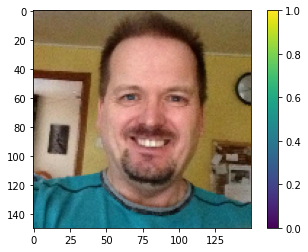

In [4]:
plt.imshow(image_pool[0])
plt.colorbar()

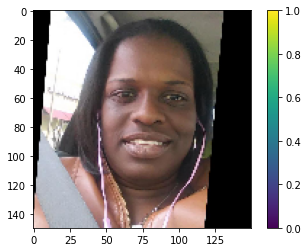

In [5]:
plt.imshow(image_pool[1])
plt.colorbar()

In [6]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [7]:
len(labels)

7591

In [8]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


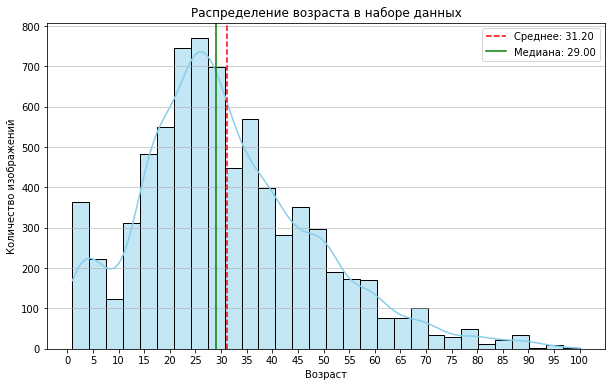

In [9]:
# Вычисляем среднее значение и медиану
mean_age = labels['real_age'].mean()
median_age = labels['real_age'].median()

plt.figure(figsize=(10, 6))

sns.histplot(data=labels, 
             x='real_age', 
             bins=30, 
             kde=True, 
             color='skyblue', 
             edgecolor='black')

# Добавляем вертикальные линии для среднего и медианы
plt.axvline(mean_age, 
            color='red', 
            linestyle='--', 
            label=f'Среднее: {mean_age:.2f}')
plt.axvline(median_age, 
            color='green', 
            linestyle='-', 
            label=f'Медиана: {median_age:.2f}')

plt.title('Распределение возраста в наборе данных')
plt.xlabel('Возраст')
plt.ylabel('Количество изображений')

plt.xticks(range(0, labels['real_age'].max() + 5, 5))

plt.grid(axis='y', alpha=0.75)

plt.legend()

plt.show()

In [10]:
images, ages = train_gen_flow.next()

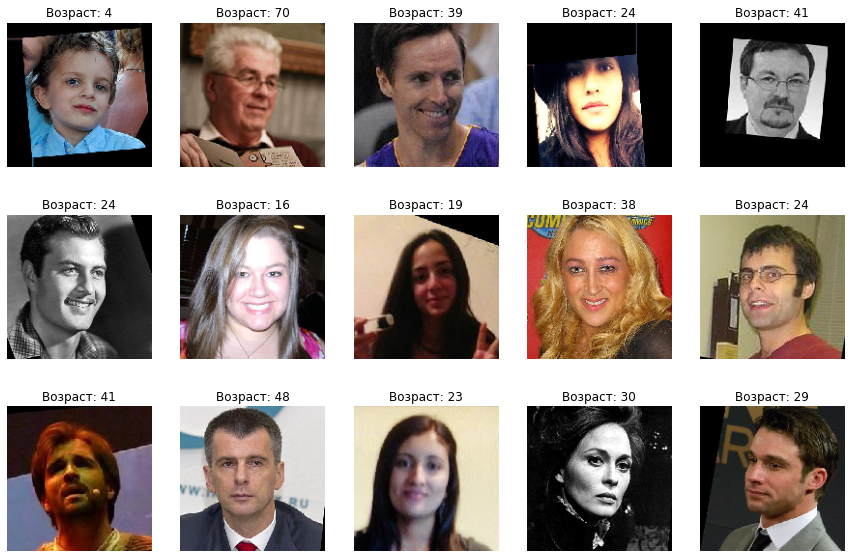

In [11]:
plt.figure(figsize=(15, 10))
for i in range(15):  # Отображаем все изображения из пакета
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Возраст: {ages[i]}')
    plt.axis('off')
plt.show()

In [ ]:
image_sizes = []
for filename in labels['file_name']:
    try:
        img = Image.open(os.path.join('/datasets/faces/final_files/', filename))
        image_sizes.append(img.size)
    except Exception as e:
        print(f"Ошибка при обработке {filename}: {e}")

widths, heights = zip(*image_sizes)

In [ ]:
df = pd.DataFrame({'width': widths, 'height': heights})

In [ ]:
# Гистограмма ширины
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='width', bins=20, kde=False, color='skyblue')
plt.title('Распределение ширины изображений')
plt.xlabel('Ширина')
plt.ylabel('Количество изображений')


plt.subplot(1,2,2)
sns.histplot(data=df, x='height', bins=20, kde=False, color='salmon')
plt.title('Распределение высоты изображений')
plt.xlabel('Высота')
plt.ylabel('Количество изображений')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Создаем DataFrame для seaborn
df = pd.DataFrame({'width': widths, 'height': heights})

# Строим график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', alpha=0.7)

plt.title('Зависимость высоты от ширины изображений')
plt.xlabel('Ширина')
plt.ylabel('Высота')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
df.describe()

**После анализа датасета изображений, можно сделать следующие выводы:**

- датасет представляет собой изображения лиц с метками возраста. 
- Объем датасета 7591 изображения и столько же меток возраста к ним. Пропуски отсутствуют, датасет подходит для решения задачи регрессии (определения возраста по фото). Однако, колисетсво изображений может быть недостаточно для хорошего обучения модели. Поэтому будем использовать RESNET50 с весами ImageNet
- Большинство изображений имеют относительно небольшие размеры (как по ширине, так и по высоте). 
- Наблюдается линейная зависимость между шириной и высотой изображений. Это говорит о том, что большинство изображений имеют примерно одинаковое соотношение сторон.
- Учитывая разнообразие размеров изображений, а также факт того, что 25% имеют размеры менее 224х224 (стандарт на котором обучалась ResNet), будем использовать аугментацию, в частоности зум.  
- В датасете представлены разнообразные изображения: люди от 1 года до 100 лет. Медианный возраст 29 лет, средний 31 год. 
- В датасете есть изображения, на которых лица смещены относительно центра. Это значит, что необходимо использовать аугментацию изображений (поворот, сдвиг) для лучшего результата.
- Фото имеют разное освещение, есть совсем темные, есть засвеченные, есть черно-белые. Это необхоидмо учесть при построении архитектуры нейронной сети.


<p><a href="#вернуться_назад">Вернуться назад</a></p>

# Обучение модели

<p id="обучение_модели"></p>

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import pandas as pd

def load_train(path):
    labels = pd.read_csv(path + '/labels.csv')
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25,
        brightness_range=[0.8, 1.2],  # Изменение яркости
        width_shift_range=0.2,        # Смещение по ширине
        height_shift_range=0.2,       # Смещение по высоте
        zoom_range=0.5,               # Зум
        horizontal_flip=True          # Горизонтальное отражение
    )
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + '/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    print('Вызвана функция load_train, длина', len(train_gen_flow))
    print('первый элемент', train_gen_flow[0][0][0])
    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + '/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + '/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        shuffle=False,
        seed=12345
    )
    print('Вызвана функция load_test, длина', len(test_gen_flow))
    print('первый элемент', test_gen_flow[0][0][0])
    return test_gen_flow


def create_model(input_shape):
    optimizer = Adam()
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', # Добавляем веса ImageNet
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    #model.add(Dense(96, activation = 'relu'))
    model.add(Dense(1, activation='relu')) # Выходной слой для регрессии

    model.compile(loss=MeanAbsoluteError(), optimizer=optimizer, metrics=['mae']) # Используем MAE
    return model
    

def train_model(model, train_data, test_data, batch_size=None, epochs=35,
               steps_per_epoch=None, validation_steps=None):
    """Обучает модель и оценивает ее на тестовой выборке."""
    print('Вызвана train_data, аргумент train_data', train_data)
    print('test_data:', test_data)
    print('validation_steps:', validation_steps)
    # Обучение модели
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    
    
    return model

```

```
Train for 178 steps, validate for 60 steps
Epoch 1/35
2025-03-14 11:15:17.911728: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-03-14 11:15:18.637813: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 140s - loss: 13.3506 - mae: 13.3515 - val_loss: 13.1041 - val_mae: 13.1757
Epoch 2/35
178/178 - 124s - loss: 12.3583 - mae: 12.3589 - val_loss: 17.3740 - val_mae: 17.4636
Epoch 3/35
178/178 - 124s - loss: 11.7262 - mae: 11.7269 - val_loss: 13.2908 - val_mae: 13.3283
Epoch 4/35
178/178 - 114s - loss: 11.4292 - mae: 11.4295 - val_loss: 12.7676 - val_mae: 12.8153
Epoch 5/35
178/178 - 124s - loss: 11.1078 - mae: 11.1082 - val_loss: 11.8640 - val_mae: 11.9052
Epoch 6/35
178/178 - 126s - loss: 10.8885 - mae: 10.8890 - val_loss: 11.4705 - val_mae: 11.5239
Epoch 7/35
178/178 - 125s - loss: 10.5703 - mae: 10.5705 - val_loss: 13.9693 - val_mae: 14.0393
Epoch 8/35
178/178 - 120s - loss: 10.4444 - mae: 10.4450 - val_loss: 12.5221 - val_mae: 12.5382
Epoch 9/35
178/178 - 115s - loss: 10.1633 - mae: 10.1635 - val_loss: 12.2342 - val_mae: 12.2990
Epoch 10/35
178/178 - 115s - loss: 9.9320 - mae: 9.9320 - val_loss: 12.6832 - val_mae: 12.7620
Epoch 11/35
178/178 - 115s - loss: 9.8819 - mae: 9.8819 - val_loss: 9.8904 - val_mae: 9.9505
Epoch 12/35
178/178 - 114s - loss: 9.6593 - mae: 9.6598 - val_loss: 12.8946 - val_mae: 12.9492
Epoch 13/35
178/178 - 114s - loss: 9.5946 - mae: 9.5945 - val_loss: 12.3460 - val_mae: 12.3852
Epoch 14/35
178/178 - 114s - loss: 9.5181 - mae: 9.5182 - val_loss: 11.0294 - val_mae: 11.0661
Epoch 15/35
178/178 - 114s - loss: 9.3371 - mae: 9.3373 - val_loss: 12.7972 - val_mae: 12.8343
Epoch 16/35
178/178 - 114s - loss: 9.4895 - mae: 9.4900 - val_loss: 9.3082 - val_mae: 9.3470
Epoch 17/35
178/178 - 114s - loss: 9.4085 - mae: 9.4090 - val_loss: 10.4337 - val_mae: 10.4982
Epoch 18/35
178/178 - 114s - loss: 9.1042 - mae: 9.1045 - val_loss: 9.5494 - val_mae: 9.5927
Epoch 19/35
178/178 - 114s - loss: 9.0750 - mae: 9.0748 - val_loss: 9.9356 - val_mae: 9.9871
Epoch 20/35
178/178 - 114s - loss: 9.0164 - mae: 9.0168 - val_loss: 11.0427 - val_mae: 11.1021
Epoch 21/35
178/178 - 115s - loss: 8.8400 - mae: 8.8402 - val_loss: 9.1054 - val_mae: 9.1502
Epoch 22/35
178/178 - 115s - loss: 8.7887 - mae: 8.7890 - val_loss: 14.2567 - val_mae: 14.3236
Epoch 23/35
178/178 - 114s - loss: 8.8195 - mae: 8.8200 - val_loss: 8.7624 - val_mae: 8.7755
Epoch 24/35
178/178 - 114s - loss: 8.6428 - mae: 8.6439 - val_loss: 8.0097 - val_mae: 8.0683
Epoch 25/35
178/178 - 115s - loss: 8.6253 - mae: 8.6253 - val_loss: 8.2306 - val_mae: 8.2545
Epoch 26/35
178/178 - 115s - loss: 8.5676 - mae: 8.5680 - val_loss: 9.2944 - val_mae: 9.3227
Epoch 27/35
178/178 - 114s - loss: 8.4522 - mae: 8.4528 - val_loss: 8.9530 - val_mae: 9.0124
Epoch 28/35
178/178 - 115s - loss: 8.4880 - mae: 8.4883 - val_loss: 8.3839 - val_mae: 8.4170
Epoch 29/35
178/178 - 114s - loss: 8.3175 - mae: 8.3178 - val_loss: 9.2225 - val_mae: 9.2509
Epoch 30/35
178/178 - 114s - loss: 8.3469 - mae: 8.3474 - val_loss: 8.4160 - val_mae: 8.4435
Epoch 31/35
178/178 - 114s - loss: 8.2736 - mae: 8.2739 - val_loss: 9.0750 - val_mae: 9.1010
Epoch 32/35
178/178 - 115s - loss: 8.1782 - mae: 8.1787 - val_loss: 8.4980 - val_mae: 8.5405
Epoch 33/35
178/178 - 114s - loss: 8.1043 - mae: 8.1048 - val_loss: 8.7564 - val_mae: 8.7812
Epoch 34/35
178/178 - 119s - loss: 8.1185 - mae: 8.1189 - val_loss: 9.0635 - val_mae: 9.1161
Epoch 35/35
178/178 - 115s - loss: 8.0069 - mae: 8.0075 - val_loss: 7.5047 - val_mae: 7.5387
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 7.5047 - mae: 7.5387
```

<p><a href="#вернуться_назад">Вернуться назад</a></p>

# Анализ обученной модели

<p id="анализ_обученной_модели"></p>

- Модель показывает явное улучшение в процессе обучения. Значения loss и mae (Mean Absolute Error) как на обучающей, так и на валидационной выборках снижаются. Это говорит о том, что модель учится предсказывать возраст более точно.
- Модель достигла хорошей сходимости, особенно к концу обучения. Значения mae на валидационной выборке стабилизировались.
- Финальное значение MAE: Финальное значение MAE на валидационной выборке составляет около 7.5. Это означает, что в среднем модель ошибается примерно на 7.5 лет при предсказании возраста.
- Время обучения на каждую эпоху достаточно долгое, это связано с тем, что используется аугментация, которая в свою очередь помогла модели уловить больше закономерностей и уменьшить ошибку.


В целом, модель показала хорошие результаты, и можно сделать вывод, что она успешно обучилась предсказывать возраст по фотографии.

<p><a href="#вернуться_назад">Вернуться назад</a></p>